In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import ensemble
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from tqdm import tqdm
import json
import time
import datetime

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/fall2022/cse512/project/hypoC

/content/drive/MyDrive/fall2022/cse512/project/hypoC


In [4]:
with open('structure_to_category_epoch.json', 'r') as f:
  data=json.load(f)

In [5]:
def getAccuracy(yhat, y):
  compare=np.equal(y, yhat)
  num_correct=np.count_nonzero(compare)
  return num_correct/len(compare)

Packing all the data

In [6]:
Xtrain=[]
ytrain=[]
Xtest=[]
ytest=[]
for i in range(15000):
  train_video=data[i]
  test_video=data[i+15000]
  Xtrain.append([train_video['published_at'], train_video['trending_date'], train_video['comment_view_ratio']])
  ytrain.append(train_video['category'])

  Xtest.append([test_video['published_at'], test_video['trending_date'], test_video['comment_view_ratio']])
  ytest.append(test_video['category'])

In [7]:
clf=ensemble.BaggingClassifier(max_samples=0.63, max_features=2/3).fit(Xtrain, ytrain)

In [8]:
pred_train=clf.predict(Xtrain)
pred_test=clf.predict(Xtest)

In [9]:
print(getAccuracy(pred_train, ytrain))
print(getAccuracy(pred_test, ytest))

0.9022
0.20053333333333334


In [11]:
train_accuracies=[]
test_accuracies=[]
for i in tqdm(range(0, 500, 10)):
  clf=ensemble.BaggingClassifier(n_estimators=i+10, max_samples=0.63, max_features=2/3).fit(Xtrain, ytrain)
  pred_train=clf.predict(Xtrain)
  pred_test=clf.predict(Xtest)
  train_accuracies.append(getAccuracy(pred_train, ytrain))
  test_accuracies.append(getAccuracy(pred_test, ytest))

100%|██████████| 50/50 [09:33<00:00, 11.47s/it]


In [12]:
print(train_accuracies[:10])
print(test_accuracies[:10])

[0.9024, 0.9688666666666667, 0.9854666666666667, 0.9918666666666667, 0.9955333333333334, 0.9967333333333334, 0.9982, 0.9979333333333333, 0.9992666666666666, 0.999]
[0.2058, 0.21806666666666666, 0.21226666666666666, 0.21246666666666666, 0.22233333333333333, 0.2134, 0.2264, 0.23053333333333334, 0.22566666666666665, 0.22613333333333333]


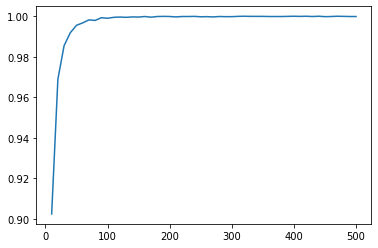

In [14]:
plt.plot(range(10, 501, 10), train_accuracies)

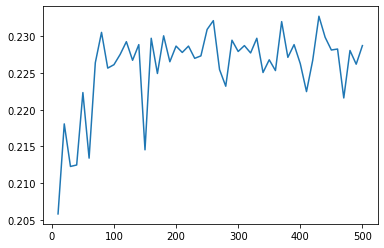

In [15]:
plt.plot(range(10, 501, 10), test_accuracies)

try to do it with svm

In [16]:
clf=make_pipeline(StandardScaler(), svm.SVC(gamma='auto'))
clf.fit(Xtrain, ytrain)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [17]:
pred_train=clf.predict(Xtrain)
pred_test=clf.predict(Xtest)
print(getAccuracy(pred_train, ytrain))
print(getAccuracy(pred_test, ytest))

0.23213333333333333
0.223
